In [1]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

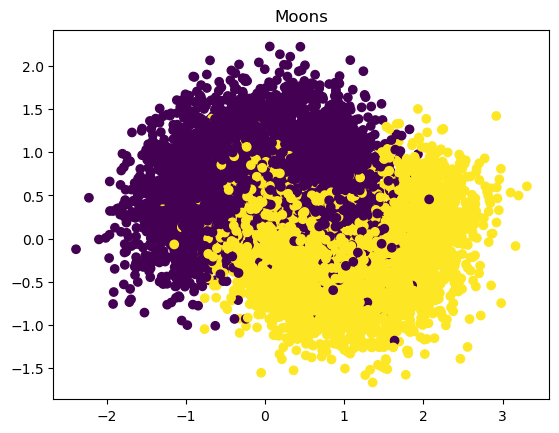

In [2]:
import matplotlib.pyplot as plt

moons_X, moons_Y = moons

plt.scatter(moons_X[:, 0], moons_X[:, 1], c=moons_Y)
plt.title("Moons")
plt.show()

In [3]:
moons

(array([[ 0.9402914 ,  0.12230559],
        [ 0.12454026, -0.42477546],
        [ 0.26198823,  0.50841438],
        ...,
        [-0.24177973,  0.20957199],
        [ 0.90679645,  0.54958215],
        [ 2.08837082, -0.05050728]], shape=(10000, 2)),
 array([1, 0, 0, ..., 1, 0, 1], shape=(10000,)))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(moons_X, moons_Y, test_size = 0.2, random_state=42, stratify=moons_Y)

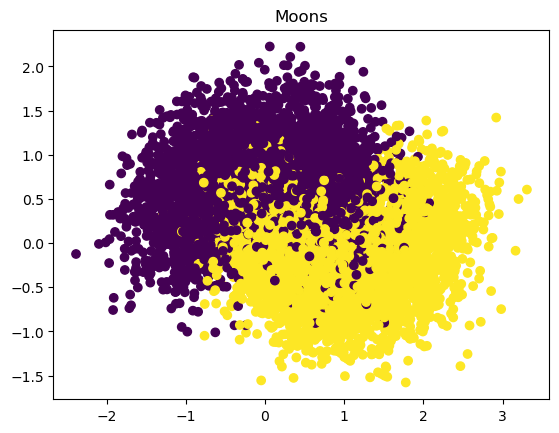

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.title("Moons")
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
cross_val_score(clf, X_train, Y_train, cv=5)

array([0.803125, 0.79625 , 0.806875, 0.800625, 0.805625])

In [7]:
clf.fit(X_train, Y_train)
clf.get_depth()

30

In [8]:
clf.get_n_leaves()

np.int64(1269)

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_leaf_nodes': [1000, 800, 600, 500], 'max_depth' : [25, 30, 35]},
]

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"[{'max_depth': [25, 30, ...], 'max_leaf_nodes': [1000, 800, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


In [10]:
grid_search.best_score_

np.float64(0.827)

In [11]:
param_grid = [
    {'max_leaf_nodes': [500, 400, 300], 'max_depth' : [31, 30, 32]},
]

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"[{'max_depth': [31, 30, ...], 'max_leaf_nodes': [500, 400, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


In [12]:
grid_search.best_score_

np.float64(0.8391249999999999)

In [13]:
param_grid = [
    {'max_leaf_nodes': [300, 200], 'max_depth' : [31]},
]

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"[{'max_depth': [31], 'max_leaf_nodes': [300, 200]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


In [14]:
grid_search.best_score_

np.float64(0.8463749999999999)

In [15]:
param_grid = [
    {'max_leaf_nodes': [200, 150, 100], 'max_depth' : [31]},
]

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"[{'max_depth': [31], 'max_leaf_nodes': [200, 150, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


In [16]:
grid_search.best_score_

np.float64(0.853375)

In [17]:
param_grid = [
    {'max_leaf_nodes': [100, 80, 60, 50], 'max_depth' : [31, 27, 23]},
]

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"[{'max_depth': [31, 27, ...], 'max_leaf_nodes': [100, 80, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


In [18]:
grid_search.best_score_

np.float64(0.8561249999999999)

In [19]:
grid_search.best_params_

{'max_depth': 31, 'max_leaf_nodes': 60}

In [20]:
model_params = grid_search.best_params_

clf = DecisionTreeClassifier(random_state=42, max_depth=31, max_leaf_nodes=60)
clf.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,31
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,60
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(clf.predict(X_train), Y_train)

0.881125

In [22]:
accuracy_score(clf.predict(X_test), Y_test)

0.858